In [1]:
# install streamlit
!pip -q install streamlit

     |████████████████████████████████| 9.1 MB 3.9 MB/s 
     |████████████████████████████████| 181 kB 70.3 MB/s 
     |████████████████████████████████| 235 kB 67.0 MB/s 
     |████████████████████████████████| 78 kB 8.8 MB/s 
     |████████████████████████████████| 164 kB 86.1 MB/s 
     |████████████████████████████████| 4.7 MB 53.2 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 51 kB 8.2 MB/s 


In [2]:
# install pyngrok
!pip -q install pyngrok

     |████████████████████████████████| 745 kB 4.0 MB/s 


In [6]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [51]:
%%writefile app.py
from pyngrok import ngrok
from sklearn.preprocessing import LabelEncoder
import joblib
import pandas as pd
import numpy as np
import streamlit as st
import catboost as cb

model = joblib.load('/content/catboost_model.sav')

def predict(building_id, meter, primary_use, air_temperature, cloud_coverage, precip_depth_1_hr, sea_level_pressure, wind_direction, wind_speed, month, day, hour, day_of_week,square_feet, dew_temperature, season, is_weekend):
  log_square_feet = np.log1p(square_feet)
  relative_humidity =100*((np.exp((17.625*dew_temperature)/(243.04+dew_temperature)))/(np.exp((17.625*air_temperature)/(243.04+air_temperature))))
  
  if season == 'Spring':
    season = 0
  elif season == 'Summer':
    season = 1
  elif season == "Autumn":
    season = 2
  elif season =='Winter':
    season = 3
  
  if is_weekend =="Yes":
    is_weekend = 1
  else:
    is_weekend = 0

  prediction = model.predict([[building_id, meter, primary_use, air_temperature, cloud_coverage, precip_depth_1_hr, sea_level_pressure, wind_direction, wind_speed, month, day, hour, day_of_week, log_square_feet, relative_humidity, season, is_weekend]])
  reading = np.expm1(prediction)
  return reading


st.title("ASHRAE GREAT ENERGY PREDICTION")
st.image('https://www.weforum.org/agenda/2021/02/why-the-buildings-of-the-future-are-key-to-an-efficient-energy-ecosystem/')
st.header("Enter the charactersticks of the Skyscrapper")

building_id = st.number_input('Buildind ID :',min_value=0,max_value=1448, value=0)
meter = st.selectbox('Meter Type:',[0,1,2,3])
primary_use = st.selectbox('Primary Use:',[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
air_temperature = st.number_input("Air Temperature:",min_value = -30.0,max_value=49.0,value=0.0)
cloud_coverage = st.number_input("Cloud Coverage:",min_value = 0.0,max_value=9.0,value=0.0)
precip_depth_1_hr = st.number_input("Precipitation Depth in 1hr:",min_value = -1.0,max_value=597.0,value=0.0)
sea_level_pressure = st.number_input("Sea Level Pressure:",min_value = 974.0,max_value=1050.0,value=974.0)
wind_direction = st.number_input("Wind Direction:",min_value= 0.0,max_value =360.0,value=0.0)
wind_speed= st.number_input("Wind Speed:",min_value= 0.0,max_value =25.0,value=0.0)
month = st.selectbox('Month:',[1,2,3,4,5,6,7,8,9,10,11,12])
day = st.selectbox("Day:",[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])
hour = st.selectbox("Hour:",[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
day_of_week=st.selectbox("Day of week:",[0,1,2,3,4,5,6])
square_feet= st.number_input("Square Feet:",min_value=1000,max_value=800000,value=1000)
dew_temperature = st.number_input("Dew Temperature:",value=0.0)
season = st.selectbox("Season:",['Spring','Summer','Autumn','Winter'])
is_weekend= st.selectbox("Weekend:",['Yes',"No"]) 

if st.button('Predict Meter Reading'):
    reading = predict(building_id, meter, primary_use, air_temperature, cloud_coverage, precip_depth_1_hr, sea_level_pressure, wind_direction, wind_speed, month, day, hour, day_of_week,square_feet, dew_temperature, season, is_weekend)
    st.success(f'Predicted meter reading is {reading[0]:.2f} ')


Writing app.py


In [41]:
!ngrok authtoken 2F273OJBTdyuIeuf7obL8t5HbS4_b4MnqmQPvDCREiMnDghm

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [52]:
public_url = ngrok.connect(port='80')
print (public_url)
!streamlit run --server.port 80 app.py >/dev/null

INFO:pyngrok.ngrok:Opening tunnel named: http-80-bad074c7-ff04-4dd2-8efb-af9b7615c891
2022-09-20 13:42:15.047 Opening tunnel named: http-80-bad074c7-ff04-4dd2-8efb-af9b7615c891
INFO:pyngrok.process.ngrok:t=2022-09-20T13:42:15+0000 lvl=info msg="no configuration paths supplied"
2022-09-20 13:42:15.227 t=2022-09-20T13:42:15+0000 lvl=info msg="no configuration paths supplied"
INFO:pyngrok.process.ngrok:t=2022-09-20T13:42:15+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
2022-09-20 13:42:15.233 t=2022-09-20T13:42:15+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
INFO:pyngrok.process.ngrok:t=2022-09-20T13:42:15+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
2022-09-20 13:42:15.241 t=2022-09-20T13:42:15+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
INFO:pyngrok.process.ngrok:t=2022-09-20T13:42:15+0000 lvl=info msg="starting web service" obj=web addr

NgrokTunnel: "http://8867-35-231-12-235.ngrok.io" -> "http://localhost:80"
2022-09-20 13:42:16.001 INFO    numexpr.utils: NumExpr defaulting to 4 threads.


INFO:pyngrok.process.ngrok:t=2022-09-20T13:42:20+0000 lvl=info msg="join connections" obj=join id=6600b9c9e671 l=127.0.0.1:80 r=103.2.234.62:1658
2022-09-20 13:42:20.640 t=2022-09-20T13:42:20+0000 lvl=info msg="join connections" obj=join id=6600b9c9e671 l=127.0.0.1:80 r=103.2.234.62:1658
INFO:pyngrok.process.ngrok:t=2022-09-20T13:42:20+0000 lvl=info msg="join connections" obj=join id=7c756eb39f2f l=127.0.0.1:80 r=103.2.234.62:1658
2022-09-20 13:42:20.955 t=2022-09-20T13:42:20+0000 lvl=info msg="join connections" obj=join id=7c756eb39f2f l=127.0.0.1:80 r=103.2.234.62:1658
INFO:pyngrok.process.ngrok:t=2022-09-20T13:42:20+0000 lvl=info msg="join connections" obj=join id=5daad878701e l=127.0.0.1:80 r=103.2.234.62:1659
2022-09-20 13:42:20.958 t=2022-09-20T13:42:20+0000 lvl=info msg="join connections" obj=join id=5daad878701e l=127.0.0.1:80 r=103.2.234.62:1659
INFO:pyngrok.process.ngrok:t=2022-09-20T13:42:21+0000 lvl=info msg="join connections" obj=join id=62b5defe94a9 l=127.0.0.1:80 r=103.2

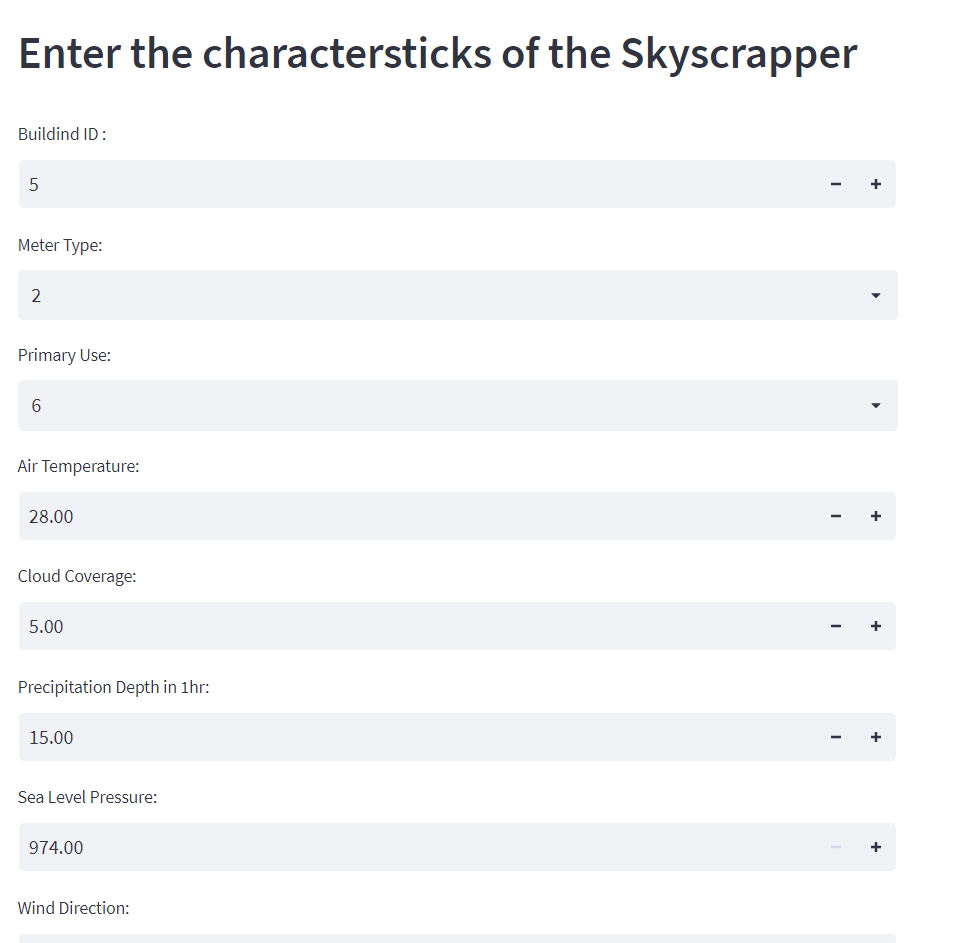

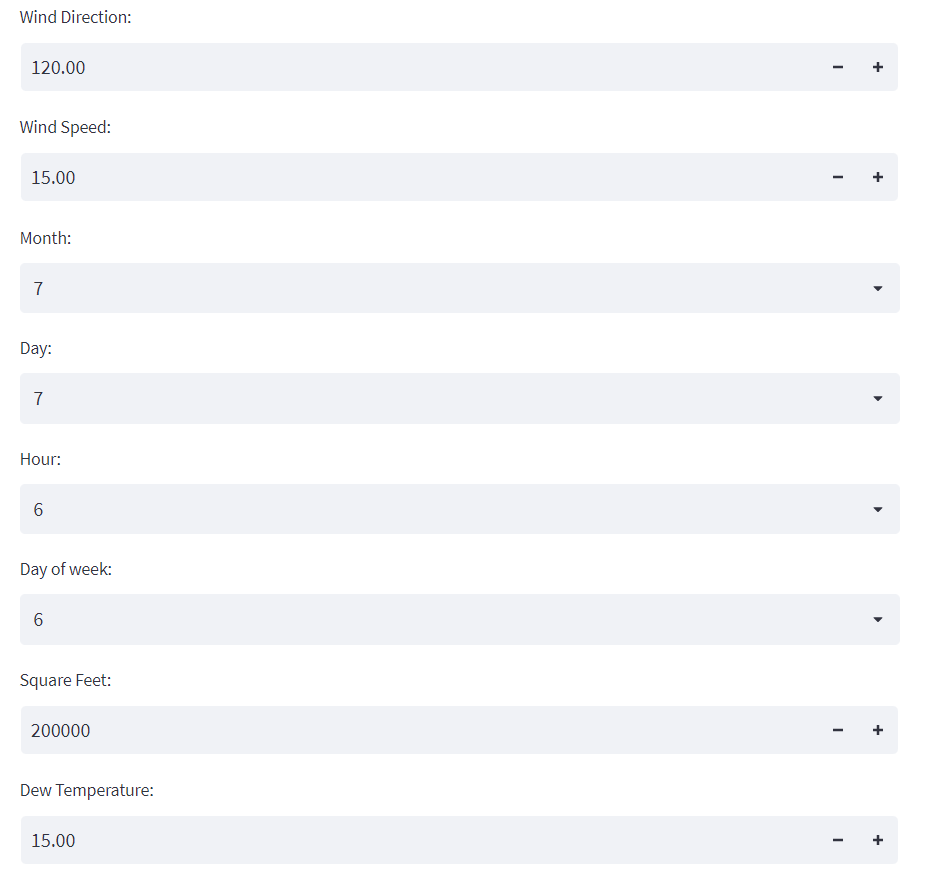

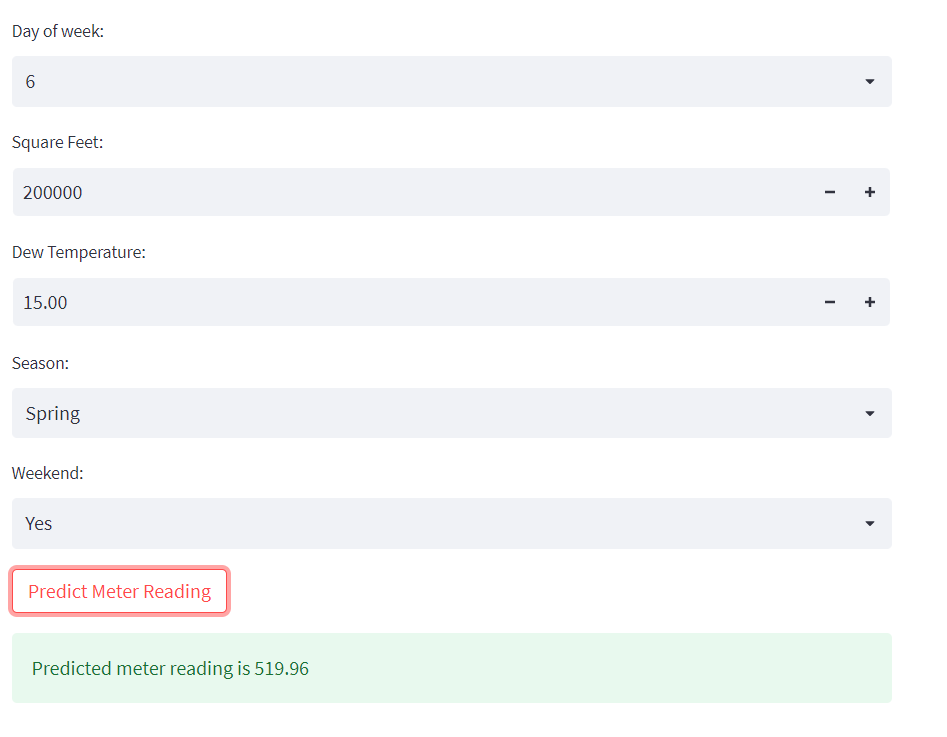